In [1]:
# import pandas as pd
# import pyarrow as pa
# import pyarrow.parquet as pq

# # Replace 'data.txt' with the actual file path to your dataset
# data_file = 'GLADE+.txt'

# # Define the column numbers you want to select
# columns_to_select = [8, 9, 27, 31, 35, 36]

# # Define corresponding column names
# column_names = ['RA', 'Dec', 'z_helio', 'z_err', 'M*', 'M*_err']

# # Load only the specified columns into a DataFrame
# df = pd.read_csv(data_file, sep=' ', usecols=columns_to_select, header=None, names=column_names)

# # Save the selected columns with a header to a Parquet file
# table = pa.Table.from_pandas(df)
# pq.write_table(table, 'selected_GLADE+_columns.parquet')

# # Save the selected columns with a header to a new file (e.g., 'selected_data.csv')
# df.to_csv('selected_GLADE+_columns.csv', index=False)


In [2]:
# Load the Parquet file into a Pandas DataFrame
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq
df = pd.read_parquet('selected_GLADE+_columns.parquet')


In [3]:
# print(df)

In [4]:

# Count the number of rows (records) in the DataFrame
#row_count = len(df)
#print(f"Number of Rows: {row_count}")

# Basic statistics of the 'M*' column
#m_star_stats = df['M*'].describe()
#print("\nStatistics of 'M*' column:")
#print(m_star_stats)

# Filter rows based on a condition (e.g., where z_helio > 0.1)
#filtered_df = df[df['z_helio'] > 0.1]

# Grouping and aggregation (e.g., mean 'M*' for each unique 'Dec' value)
#mean_m_star_by_dec = df.groupby('Dec')['M*'].mean()
#print("\nMean 'M*' by 'Dec':")
#print(mean_m_star_by_dec)

import healpy as hp
import matplotlib.pyplot as plt
import numpy as np
# Filter galaxies within the specified redshift range
z_min = 1e-4
z_max = 0.1
filtered_df = df[(df['z_helio'] >= z_min) & (df['z_helio'] <= z_max)]

# Define the number of pixels in the HEALPix map
nside = 256  # Adjust the resolution as needed

declination_values = filtered_df['Dec']  # Replace 'Dec' with your actual column name

# Check if any Declination values are outside the range of -90 to 90 degrees
outside_range = (declination_values < -90) | (declination_values > 90)

# Print the results
if outside_range.any():
    print("Some Declination values are outside the specified range.")
else:
    print("All Declination values are within the range of -90 to 90 degrees.")


# Convert RA and Dec to theta and phi
theta = np.radians(90 - declination_values)
phi = np.radians(filtered_df['RA'])

outside_range = ((theta < 0) | (theta > (np.pi)))
# if outside_range.any():
#     print("Some Declination values are outside the specified range.")
# else:
#     print("All Declination values are within the range of 0 to pi degrees.")
# Create an empty HEALPix map
galaxy_map = np.zeros(hp.nside2npix(nside))

# Check if any theta values are outside the range of [0, pi]
theta_min = theta.min()
theta_max = theta.max()
print(theta_min)
print(theta_max)
if theta_min < 0 or theta_max > np.pi:
    print("Some theta values are outside the range [0, pi].")
else:
    print("All theta values are within the range [0, pi].")

# Fill the map with galaxies
#ipix = hp.ang2pix(nside,90 - declination_values, filtered_df['RA'], nest = False, lonlat = True)
ipix = hp.ang2pix(nside, theta ,phi)
galaxy_map[ipix] = 1  # You can set a value (e.g., 1) to mark the presence of a galaxy

# Visualize the HEALPix map
# hp.mollview(galaxy_map, title=f'GLADE+ Galaxies ({z_min} <= z <= {z_max})', cmap='viridis')
# plt.show()

# Count the number of galaxies
galaxy_count = len(filtered_df)
print(f"Number of Galaxies: {galaxy_count}")

All Declination values are within the range of -90 to 90 degrees.
0.0015166649400443581
3.1413973390291905
All theta values are within the range [0, pi].
Number of Galaxies: 3208921


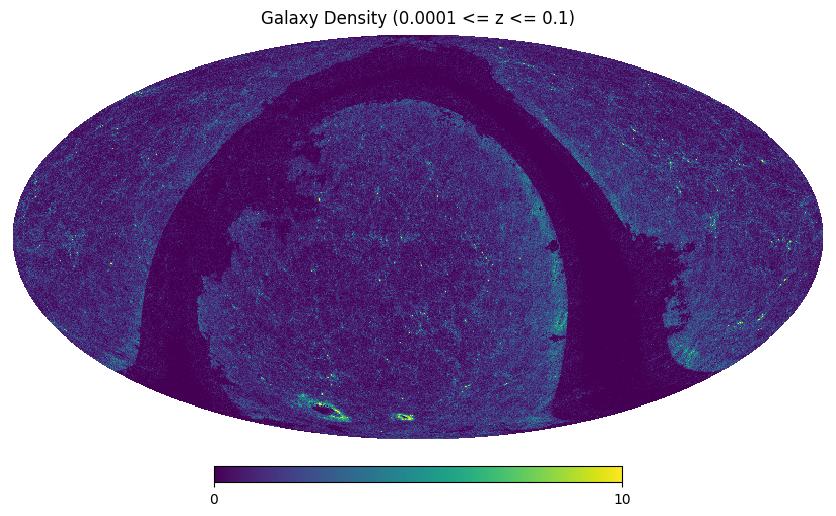

In [5]:
import healpy as hp
import matplotlib.pyplot as plt
import numpy as np

# Filter galaxies within the specified redshift range
z_min = 1e-4
z_max = 0.1
filtered_df = df[(df['z_helio'] >= z_min) & (df['z_helio'] <= z_max)]

# Define the number of pixels in the HEALPix map
nside = 256  # Adjust the resolution as needed

# Convert RA and Dec to theta and phi
theta = np.radians(90 - filtered_df['Dec'])
phi = np.radians(filtered_df['RA'])

# Create an empty HEALPix map for galaxy density
galaxy_density_map = np.zeros(hp.nside2npix(nside))

# Calculate galaxy density in each pixel
ipix = hp.ang2pix(nside, theta, phi)
for pixel in ipix:
    galaxy_density_map[pixel] += 1  # Increment density for each galaxy in the pixel
#galaxy_density_map.isfinite()
mean = np.mean(galaxy_density_map)
density = galaxy_density_map/mean

# Visualize the HEALPix density map
hp.mollview(density, title=f'Galaxy Density ({z_min} <= z <= {z_max})', cmap='viridis', min=0, max=10)#galaxy_density_map.max())
plt.show()


In [6]:
# Define the number of pixels in the HEALPix map
nside = 256

# Correct the mass values by multiplying them by 10^10
filtered_df['M*'] = filtered_df['M*'] * 1e10

print(filtered_df['M*'])

0                    NaN
1           3.000000e+09
2                    NaN
3           6.800000e+09
4           2.000000e+09
                ...     
23171740             NaN
23173319             NaN
23173681             NaN
23174571             NaN
23175722             NaN
Name: M*, Length: 3208921, dtype: float64


/tmp/ipykernel_2086/2310265830.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['M*'] = filtered_df['M*'] * 1e10


In [7]:
# ###########  HEALPY PROJECTION OF GALAXIES AS MASK MAP

# ## import healpy as hp
# import matplotlib.pyplot as plt


# mass_bins = np.logspace(6, 12, num=7, base=10)
# #print(mass_bins)

# filtered_df['mass_bin'] = pd.cut(filtered_df['M*'], bins=mass_bins, labels=False)
# #print(filtered_df['mass_bin'])

# # num_mass_bins = len(mass_bins) - 1
# # num_cols = 3 
# # num_rows = (num_mass_bins + num_cols - 1) // num_cols  
# #fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# for i, mass_bin in enumerate(mass_bins[:-1]):

#     bin_df = filtered_df[filtered_df['mass_bin'] == i]
#     #print("bin_df = ",bin_df) 
#     # Check the number of galaxies in this bin
#     num_galaxies = len(bin_df)
    
#     theta = np.radians(90 - bin_df['Dec'])
#     phi = np.radians(bin_df['RA'])
    
#     # Create an empty HEALPix map
#     galaxy_map = np.zeros(hp.nside2npix(nside))
    
#     # Fill the map with galaxies
#     ipix = hp.ang2pix(nside, theta, phi,)
#     galaxy_map[ipix] = 1
    
    
#     # Plot the HEALPix map
#     hp.mollview(galaxy_map, title=f'Mass Bin {i+1}: {mass_bin:.0e} - {mass_bins[i+1]:.0e}', cmap='viridis')
    
#     # Print the number of galaxies in this bin
#     # print(f"Mass Bin {i+1}: {mass_bin:.0e} - {mass_bins[i+1]:.0e}")
#     # print(f"Number of galaxies: {num_galaxies}")

# # Adjust subplot layout and display the plots
# #plt.tight_layout()
# plt.show()


In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Define the mass bins in log scale (from 1e6 to 1e12 in units of 1e10 solar masses)
mass_bins = np.logspace(6, 12, num=7, base=10)

# Create a new column 'mass_bin' to store the bin category
filtered_df['mass_bin'] = pd.cut(filtered_df['M*'], bins=mass_bins, labels=False)

# Define the number of pixels in the HEALPix map
nside = 256  # Adjust the resolution as needed

for i, mass_bin in enumerate(mass_bins[:-1]):
    # Filter galaxies in the current mass bin
    bin_df = filtered_df[filtered_df['mass_bin'] == i]

    # Calculate the galaxy density in each pixel for this mass bin
    theta = np.radians(90 - bin_df['Dec'])
    phi = np.radians(bin_df['RA'])
    galaxy_density_map = np.zeros(hp.nside2npix(nside))
    ipix = hp.ang2pix(nside, theta, phi)
    for pixel in ipix:
        galaxy_density_map[pixel] += 1

    # Visualize the HEALPix density map
    #  hp.mollview(
    #     galaxy_density_map,
    #     title=f'Density Map - Mass Bin {i+1}: {mass_bin:.0e} - {mass_bins[i+1]:.0e}',
    #     cmap='viridis',
    #     min=0,
    #     max=10 #galaxy_density_map.max()
    # )

# plt.show()


/tmp/ipykernel_2086/1630827639.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['mass_bin'] = pd.cut(filtered_df['M*'], bins=mass_bins, labels=False)


In [9]:
###############################################CREATING MASKED REGION CELL No 1#############################################
import numpy as np
import healpy as hp

# Define the HEALPix parameters
nside = 256  # Choose an appropriate NSIDE value

# Create a HEALPix map
n_pix = hp.nside2npix(nside)
galaxy_map = np.zeros(n_pix)

# Define the center coordinates (RA and Dec) and standard deviation for the Gaussian
center_ra = 55  # Replace with your chosen RA coordinate
center_dec = 30  # Replace with your chosen Dec coordinate
std_ra = 10  # Standard deviation in degrees for RA
std_dec = 10  # Standard deviation in degrees for Dec

# Calculate the Gaussian values and set the mask based on the threshold
threshold = 0.5


# for index, galaxy in filtered_df.iterrows():
#     ra = galaxy['RA']
#     dec = galaxy['Dec']

#     # Calculate the Gaussian value for this galaxy
#     gaussian_value = np.exp(
#         -((ra - center_ra) ** 2 / (2 * std_ra ** 2) + (dec - center_dec) ** 2 / (2 * std_dec ** 2))
#     )

#     # Calculate the pixel index for this galaxy's position
#     theta = np.radians(90 - dec)
#     phi = np.radians(ra)
#     ipix = hp.ang2pix(nside, theta, phi)

#     # If the Gaussian value is above the threshold, set the corresponding pixel to 1
#     if gaussian_value > threshold:
#         galaxy_map[ipix] = 1

# # Plot the HEALPix map
# hp.mollview(galaxy_map, title="Mask Map", cmap="viridis")

# To further process or filter your galaxies based on this mask, you can use the `galaxy_map`.
# For each galaxy, calculate its pixel index using `hp.ang2pix`, and check the corresponding value in `galaxy_map`.


n_pix =  786432
nside =  256
center_ra =  55


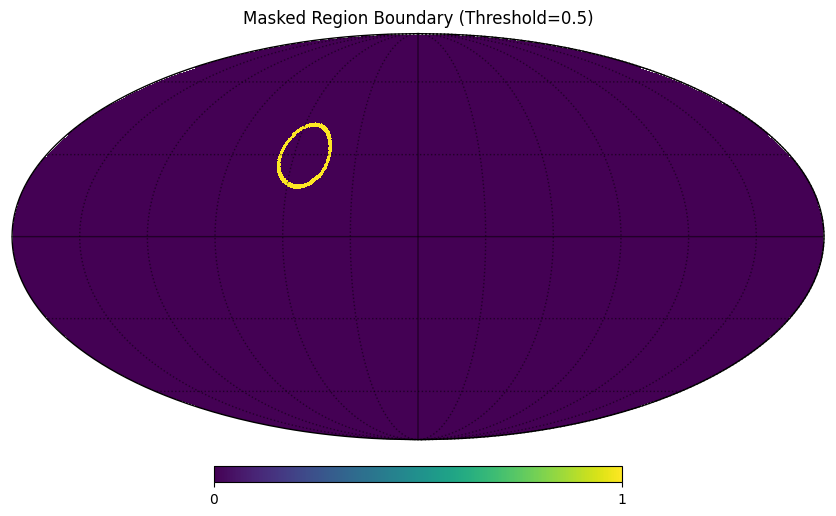

In [10]:
import healpy as hp
import numpy as np

# Initialize empty lists for boundary RA and Dec
boundary_ras = []
boundary_decs = []
print("n_pix = ",n_pix)
print("nside = ",nside)
print("center_ra = ", center_ra)
# Iterate through each pixel in the map
for i in range(n_pix):
    
    # Calculate the theta and phi from pixel index
    theta, phi = hp.pix2ang(nside, i)
    # print(theta,phi)
    
    # Convert to RA and Dec
    ra = np.degrees(phi)
    dec = 90 - np.degrees(theta)
    # print("ra = ", ra)
    # print("dec = ", dec)
    
    # Calculate Gaussian value for this pixel
    gaussian_value = np.exp(
        -((ra - center_ra) ** 2 / (2 * std_ra ** 2) + (dec - center_dec) ** 2 / (2 * std_dec ** 2))
    )
    #print(gaussian_value)
    # Check if Gaussian value is above or equal to the threshold
    if round(gaussian_value,1) == round(threshold,1):
        # Add RA and Dec to boundary lists
        boundary_ras.append(ra)
        boundary_decs.append(dec)

boundary_map = np.zeros(n_pix)

for i in range(len(boundary_ras)):
    ra = boundary_ras[i]
    dec = boundary_decs[i]

    # Convert RA and Dec to pixel index
    ipix = hp.ang2pix(nside, np.radians(90 - dec), np.radians(ra))

    # Set the pixel value in the boundary map to 1
    boundary_map[ipix] = 1

# Plot the boundary map using HEALPix Mollview
hp.mollview(boundary_map, title="Masked Region Boundary (Threshold={})".format(threshold), cmap="viridis")

# Adjust plot properties as needed
hp.graticule( alpha=0.5)
# plt.show()




In [11]:
# min_dec_index = boundary_decs.index(min_dec)
# corresponding_ra = boundary_ras[min_dec_index]
# print(f"Corresponding RA for min_dec ({min_dec}): {corresponding_ra}")


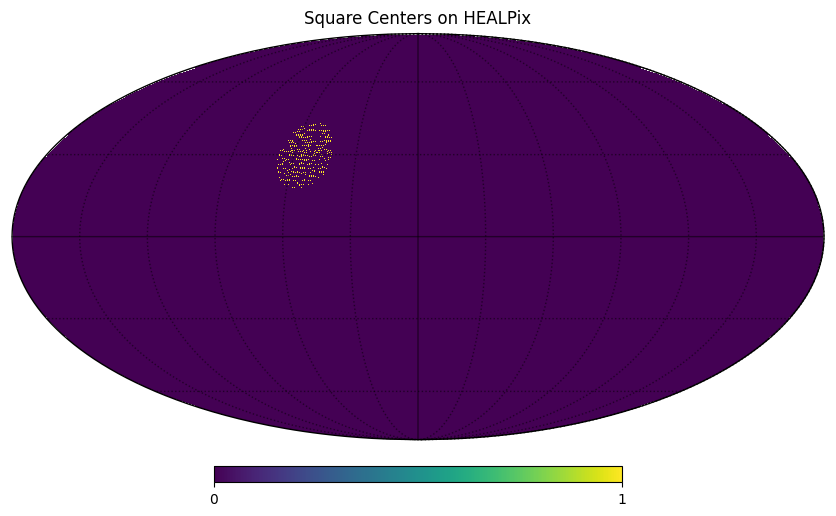

1031


In [12]:
# Import necessary libraries
import healpy as hp
import numpy as np

# Minimum and maximum RA and Dec values from boundary points
min_ra = min(boundary_ras)
max_ra = max(boundary_ras)
min_dec = min(boundary_decs)
max_dec = max(boundary_decs)

def point_within_boundary(ra, dec):
    """
    Check if a point (RA, Dec) falls within the masked region defined by the Gaussian boundary.
    """
    ipix = hp.ang2pix(nside, np.radians(90 - dec), np.radians(ra))
    gaussian_value = np.exp(
        -((ra - center_ra) ** 2 / (2 * std_ra ** 2) + (dec - center_dec) ** 2 / (2 * std_dec ** 2))
    )
    return gaussian_value > 0.44

# Field of view (FoV) in degrees
fov = 0.5  # Set your desired FoV

def find_starting_ra(dec, fov, min_ra, max_ra):
    """
    Finds the RA value within a given Dec range where the Gaussian value is closest to 0.5.
    """
    # Iterate through RA values within the FoV range of the current Dec
    for ra in np.arange(min_ra, max_ra, fov):  # Adjust step size as needed
        gaussian_value = np.exp(
            -((ra - center_ra) ** 2 / (2 * std_ra ** 2) + (dec - center_dec) ** 2 / (2 * std_dec ** 2))
        )
        # print("ra = ",ra)
        # print("gauss = ",gaussian_value)
        if np.isclose(gaussian_value, 0.5, atol=0.05):  # Adjust tolerance as needed
            # print(ra)
            return ra

    # If no RA value within the FoV satisfies the condition, raise an exception or return a default value
    raise ValueError("No starting RA found with Gaussian value close to 0.5")

# Initialize empty lists for valid square centers and areas
valid_square_centers = []
square_areas = []
prev_ra = find_starting_ra(min_dec, fov, min_ra, max_ra)
# Loop through Dec range with FoV steps
for dec in np.arange(min_dec, max_dec + fov, fov):
     # Find starting RA where Gaussian value is 0.5
    current_ra = prev_ra
    # print("current_ra = ",current_ra)
    # Continue looping from previous RA until reaching edge of boundary inside FoV
    while current_ra < max_ra:
        square_center_ra = current_ra + fov
        square_center_dec = dec + fov
        
       
        if point_within_boundary(square_center_ra, square_center_dec):
            valid_square_centers.append((square_center_ra, square_center_dec))
            square_areas.append(fov ** 2)  # Area of square based on FoV
            current_ra = square_center_ra + fov  # Update current RA for next iteration
        else:
            # No boundary point within FoV, break the loop and move to next Dec
            break
    current_ra = prev_ra
    while current_ra > min_ra:
        square_center_ra = current_ra - fov
        square_center_dec = dec - fov
        
       
        if point_within_boundary(square_center_ra, square_center_dec):
            valid_square_centers.append((square_center_ra, square_center_dec))
            square_areas.append(fov ** 2)  # Area of square based on FoV
            current_ra = square_center_ra - fov  # Update current RA for next iteration
            # print(f"valid points = ({square_center_ra},{square_center_dec})")
        else:
            # No boundary point within FoV, break the loop and move to next Dec
            break
# print("valid square centres = ", valid_square_centers)
# ... (proceed with galaxy grouping using maskmap, valid_square_centers, and square_areas)
# Initialize empty HEALPix map for square centers
center_map = np.zeros(n_pix)

for ra, dec in valid_square_centers:
    ipix = hp.ang2pix(nside, np.radians(90 - dec), np.radians(ra))
    center_map[ipix] = 1
    # print(center_map)

# Plot the HEALPix map with square centers
hp.mollview(center_map, title="Square Centers on HEALPix", cmap="viridis")
hp.graticule(alpha=0.5)
plt.show()
print(len(valid_square_centers))

3119


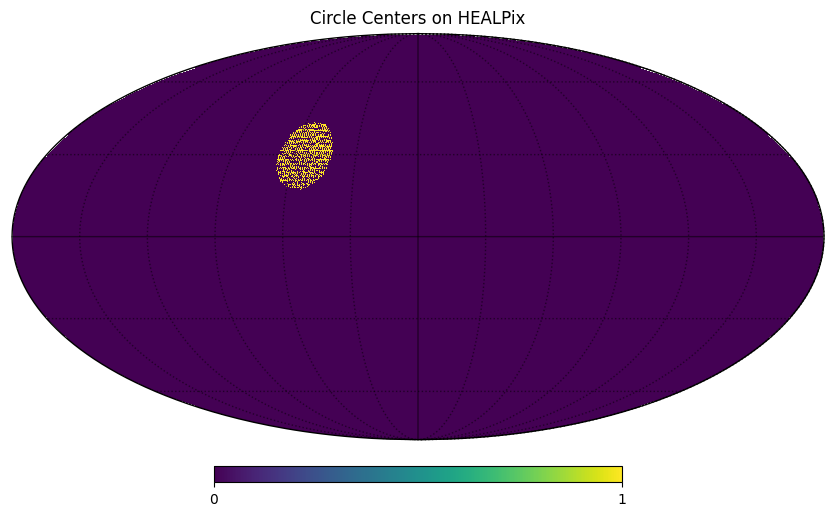

In [13]:

# Initialize empty set for unique circle centers (using a set for efficient uniqueness checks)
unique_circle_centers = set()
#unique_circle_centers = []
# Loop through valid square centers
for square_center in valid_square_centers:
    # Extract RA and Dec from the square center tuple
    square_center_ra = square_center[0]
    square_center_dec = square_center[1]

    # Create circle centers at the four edges of the square
    circle_centers = [
        (square_center_ra + fov / 2, square_center_dec),
        (square_center_ra - fov / 2, square_center_dec),
        (square_center_ra, square_center_dec + fov / 2),
        (square_center_ra, square_center_dec - fov / 2),
    ]

    # Add unique circle centers to the set
    unique_circle_centers.update(circle_centers)

# Convert the set of unique circle centers to a list for saving
unique_circle_centers_list = list(unique_circle_centers)
print(len(unique_circle_centers))
# # Save unique circle centers to a file
# with open("circle_centers.txt", "w") as f:
#     for center in unique_circle_centers_list:
#         f.write(f"{center[0]} {center[1]}\n")
for ra, dec in unique_circle_centers_list:
    ipix = hp.ang2pix(nside, np.radians(90 - dec), np.radians(ra))
    center_map[ipix] = 1
    # print(center_map)

# Plot the HEALPix map with square centers
hp.mollview(center_map, title="Circle Centers on HEALPix", cmap="viridis")
hp.graticule(alpha=0.5)
plt.show()

In [14]:
###############################################CREATING MASKED REGION CELL No 2#############################################
import numpy as np

# Define the parameters of the distribution function
m_break = 9  # Pivotal point of change of slope
alpha1 = 2.4  # Power-law index for the low-mass regime
alpha2 = -3.4  # Power-law index for the high-mass regime
delta = 0.015  # Smoothness parameter

# Calculate probabilities for each galaxy based on their mass
def calculate_probability(mass):
    dm = np.log10(mass)
    prob = ((dm/m_break) ** alpha1) * (((1/2)*(1+(dm/m_break)**(1/delta)))**((alpha2-alpha1)*delta))
    return prob


In [15]:
# ##############################Creating new dataframe containing masked galaxies, and plotting calc prob function###############################
###############################################CREATING MASKED REGION CELL No 3#############################################
# # Calculate probabilities and add them to the filtered_df
# filtered_df['Probability'] = filtered_df['M*'].apply(calculate_probability)

# # Create an empty DataFrame to store the filtered galaxies
# filtered_galaxies_df = pd.DataFrame(columns=filtered_df.columns)

# # Iterate over galaxies in the mask and add them to the filtered_galaxies_df
# for index, galaxy in filtered_df.iterrows():
#     ra = galaxy['RA']
#     dec = galaxy['Dec']
#     theta = np.radians(90 - dec)
#     phi = np.radians(ra)
#     ipix = hp.ang2pix(nside, theta, phi)

#     if galaxy_map[ipix] == 1:
#         filtered_galaxies_df = pd.concat([filtered_galaxies_df, galaxy.to_frame().T])

# print(filtered_galaxies_df)
# filtered_galaxies_df['Probability'] = filtered_galaxies_df['Probability']/np.sum(filtered_galaxies_df['Probability'])
# # Now, filtered_galaxies_df contains galaxies that are within the mask

# # To visualize the probability function with a log mass scale, you can do the following:
# import matplotlib.pyplot as plt

# # Define a range of masses in log scale
# log_mass_range = np.logspace(6, 13, num=100, base=10)

# # Calculate probabilities for the given mass range
# probability_values = [calculate_probability(mass) for mass in log_mass_range]

# # Create a plot
# plt.figure(figsize=(10, 6))
# plt.semilogx(log_mass_range, probability_values)
# plt.title("Probability Distribution vs. Log Stellar Mass")
# plt.xlabel("Log Stellar Mass")
# plt.ylabel("Probability")
# plt.grid(True)
# plt.show()


# print(filtered_galaxies_df)

# import pyarrow as pa
# import pyarrow.parquet as pq

# # Save the selected columns with a header to a Parquet file
# filtered_galaxies_df = filtered_galaxies_df.dropna(subset=['M*'], how='any')
# table = pa.Table.from_pandas(filtered_galaxies_df)
# pq.write_table(table, 'Maskmap centered at (55,30).parquet')

# filtered_galaxies_df.to_csv('Maskmap centered at (55,30).csv', index=False)


In [16]:
import numpy as np

def haversine(ra1, dec1, ra2, dec2):
    # Convert RA and Dec from degrees to radians
    ra1 = np.radians(ra1)
    dec1 = np.radians(dec1)
    ra2 = np.radians(ra2)
    dec2 = np.radians(dec2)

    # Haversine formula
    dlon = ra2 - ra1
    dlat = dec2 - dec1
    a = np.sin(dlat/2)**2 + np.cos(dec1) * np.cos(dec2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))

    # Calculate the angular distance (in radians)
    distance = c

    # Convert the angular distance from radians to degrees
    distance_deg = np.degrees(distance)

    return distance_deg

# Example usage:
ra1 = 45.0  # Replace with the RA of the first point
dec1 = 30.0  # Replace with the Dec of the first point
ra2 = 50.0  # Replace with the RA of the second point
dec2 = 35.0  # Replace with the Dec of the second point

angular_distance = haversine(ra1, dec1, ra2, dec2)
print(f"Angular distance: {angular_distance} degrees")


Angular distance: 6.538687182155884 degrees


20209


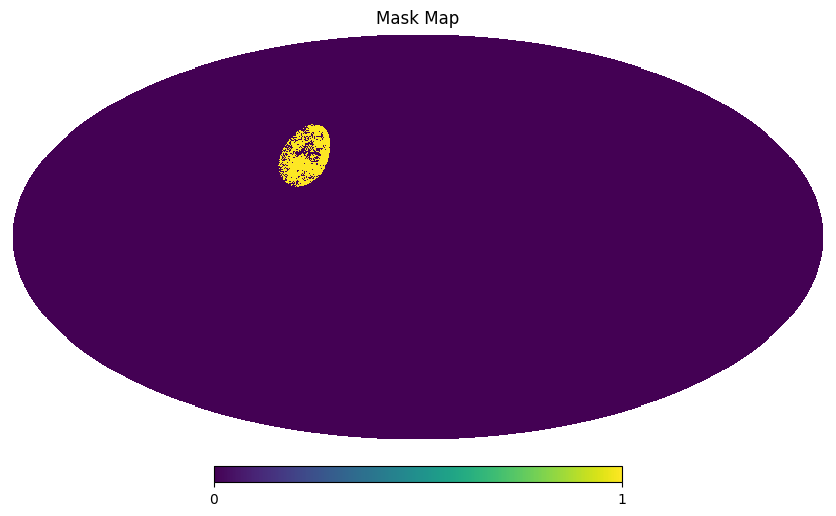

In [17]:
import pandas as pd
maskmap = pd.read_parquet('Maskmap centered at (55,30).parquet')
galaxy__map = np.zeros(hp.nside2npix(nside))
for index, galaxy in maskmap.iterrows():
    ra = galaxy['RA']
    dec = galaxy['Dec']
    theta = np.radians(90 - dec)
    phi = np.radians(ra)
    ipix = hp.ang2pix(nside, theta, phi)
    galaxy__map[ipix] = 1

hp.mollview(galaxy__map, title="Mask Map", cmap="viridis")
print(len(maskmap))


In [18]:
import pandas as pd
import numpy as np
import healpy as hp

# ... (load maskmap and unique_circle_centers_list as before)

# Initialize empty list for the new array
new_array = []

# Loop through unique circle centers
for circle_center in unique_circle_centers_list:
    ra = circle_center[0]
    dec = circle_center[1]

    # Filter maskmap galaxies within the circle
    # within_circle = maskmap[
    #     (np.abs(maskmap['RA'] - ra) <= fov / 2)
    #     & (np.abs(maskmap['Dec'] - dec) <= fov / 2)
    # ]
    within_circle = maskmap[
    np.sqrt(((maskmap['RA'] - ra) ** 2) + ((maskmap["Dec"] - dec) ** 2)) <= fov / 2]


    # Sum probabilities of galaxies within the circle
    total_probability = within_circle["Probability"].sum()

    # Create a row for the new array
    new_row = {"RA": ra, "Dec": dec, "Probability": total_probability}
    new_array.append(new_row)

# Convert the list to a DataFrame
new_df = pd.DataFrame(new_array)

# Print the new dataframe to view the results
print(new_df)

# You can now use this new_df for further analysis or visualization


             RA        Dec  Probability
0     57.363281  29.176323     0.001158
1     66.113281  25.426323     0.000000
2     66.113281  25.926323     0.000043
3     57.363281  29.676323     0.000408
4     52.613281  40.426323     0.000547
...         ...        ...          ...
3114  48.113281  35.926323     0.000532
3115  65.363281  34.176323     0.000126
3116  65.363281  34.676323     0.000124
3117  55.363281  20.176323     0.000000
3118  55.363281  20.676323     0.000053

[3119 rows x 3 columns]


In [19]:
%run Simulation&summary.ipynb
%run Algorithms.ipynb
%run "Executing Algorithms and Summary.ipynb"

Rate Progress:   0%|                       | 0/4 [00:00<?, ?it/s]

Cutoff Time Progress: 100%|███████| 2/2 [00:00<00:00, 212.61it/s]


Cutoff Time Progress: 100%|███████| 2/2 [00:00<00:00, 213.85it/s]


Cutoff Time Progress: 100%|███████| 2/2 [00:00<00:00, 127.45it/s]


Std Dev Progress: 100%|████████████| 1/1 [00:00<00:00, 15.21it/s]


In [20]:
# print(np.array([[maskmap['RA'],maskmap['Dec']]]))
# print(np.array([maskmap['Probability']]))

# Create a new array of (x, y) tuples
galaxy_coordinates = [[x, y] for x, y in zip(new_df['RA'], new_df['Dec'])]

#print(galaxy_coordinates)


In [21]:
paths_compounded_twice = []
n_s = [0,0.1,1,100]
num_galaxy = len(new_df['Probability'])
paths_compounded, n_array = generate_paths_compounded1([np.array(galaxy_coordinates)],np.array([new_df['Probability']]),n_s)
#print("paths_compounded = ",paths_compounded,"\nn_array = ",n_array)
paths_compounded_twice.append(paths_compounded)



In [22]:
print(num_galaxy)

3119


In [23]:
print(cutoff_time)

100


In [24]:
rate_of_movements = [0.001,0.01,0.1,1] #degrees per second, correspond to x ray, optical, gamma, radio telescopes 
cutoff_times = [86400,21600,3600,60] #24 hours, 6 hours, 1 hour, 5 seconds used here #9 days, 16 days, 1.74 seconds, 110 days observed in freq bands above in GW170817
for i,rate_of_movement in enumerate(rate_of_movements):
    for cutoff_time in cutoff_times:
        #cutoff_time = cutoff_times[i]
        cutoff_distance = convert_time_to_distance(cutoff_time, rate_of_movement) 
        print("For rate = ",rate_of_movement," degress/sec and cutoff_time = ",cutoff_time," seconds")
        success_rates,success_times, n_values = run_simulation([np.array(galaxy_coordinates)],np.array([new_df['Probability']]),1,cutoff_distance,len(n_s),paths_compounded,n_array)
        for i in range(len(success_rates)):
            print("Success Rate for Metric {} (n = {:.2f}): {:.2f}%".format(i+1,n_values[i], success_rates[i] * 100))

For rate =  0.001  degress/sec and cutoff_time =  86400  seconds
Success Rate for Metric 1 (n = 0.00): 0.00%
Success Rate for Metric 2 (n = 0.10): 0.00%
Success Rate for Metric 3 (n = 1.00): 0.00%
Success Rate for Metric 4 (n = 100.00): 0.00%
For rate =  0.001  degress/sec and cutoff_time =  21600  seconds
Success Rate for Metric 1 (n = 0.00): 0.00%
Success Rate for Metric 2 (n = 0.10): 0.00%
Success Rate for Metric 3 (n = 1.00): 0.00%
Success Rate for Metric 4 (n = 100.00): 0.00%
For rate =  0.001  degress/sec and cutoff_time =  3600  seconds
Success Rate for Metric 1 (n = 0.00): 0.00%
Success Rate for Metric 2 (n = 0.10): 0.00%
Success Rate for Metric 3 (n = 1.00): 0.00%
Success Rate for Metric 4 (n = 100.00): 0.00%
For rate =  0.001  degress/sec and cutoff_time =  60  seconds
Success Rate for Metric 1 (n = 0.00): 0.00%
Success Rate for Metric 2 (n = 0.10): 0.00%
Success Rate for Metric 3 (n = 1.00): 0.00%
Success Rate for Metric 4 (n = 100.00): 0.00%
For rate =  0.01  degress/sec an

For rate =  0.001  degress/sec and cutoff_time =  86400  seconds


/tmp/ipykernel_2086/3199503427.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.gca().set_prop_cycle('color', plt.cm.get_cmap('tab10').colors)


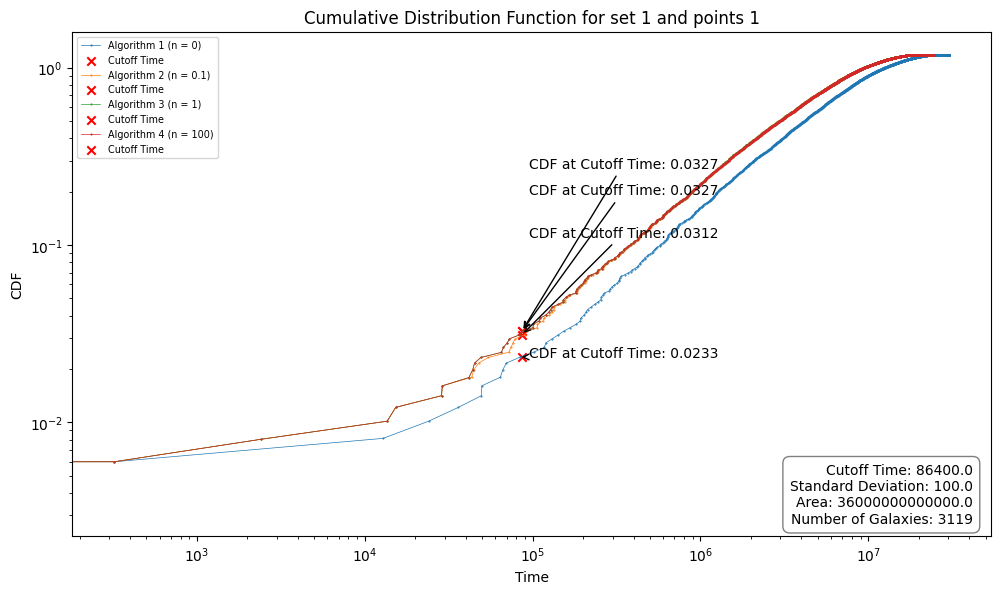

For rate =  0.001  degress/sec and cutoff_time =  21600  seconds


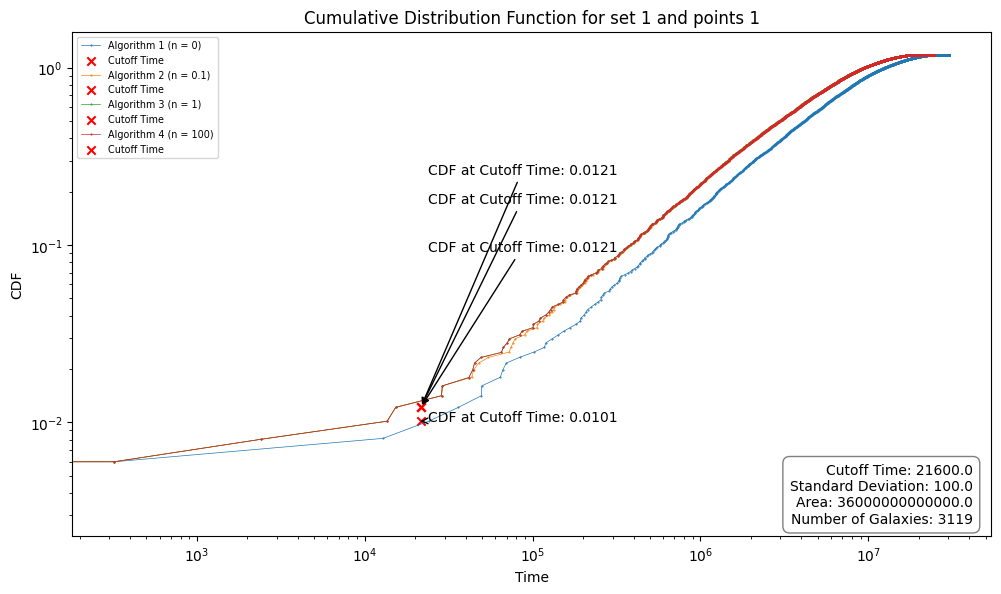

For rate =  0.001  degress/sec and cutoff_time =  3600  seconds


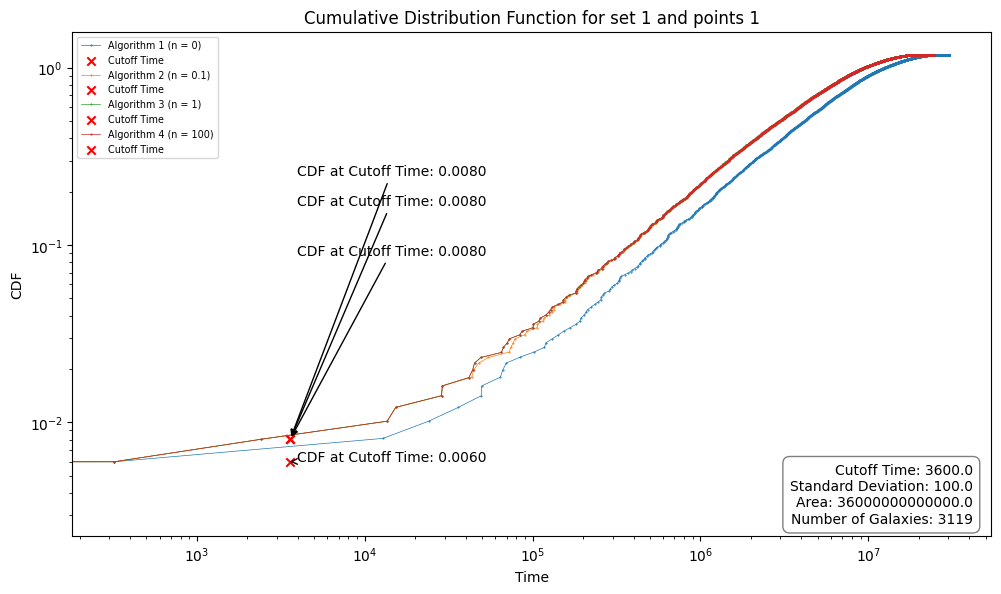

For rate =  0.001  degress/sec and cutoff_time =  60  seconds


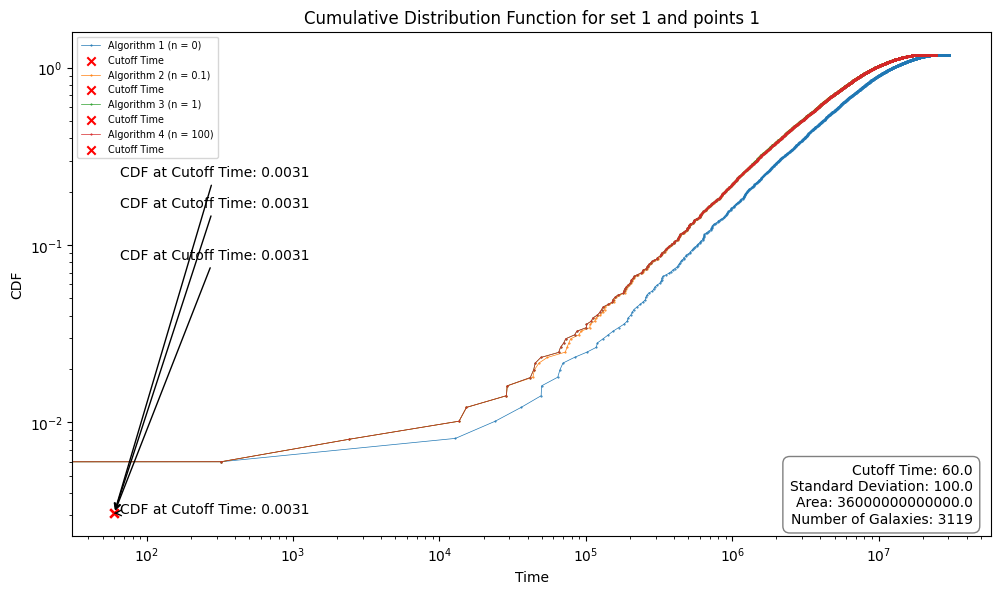

For rate =  0.01  degress/sec and cutoff_time =  86400  seconds


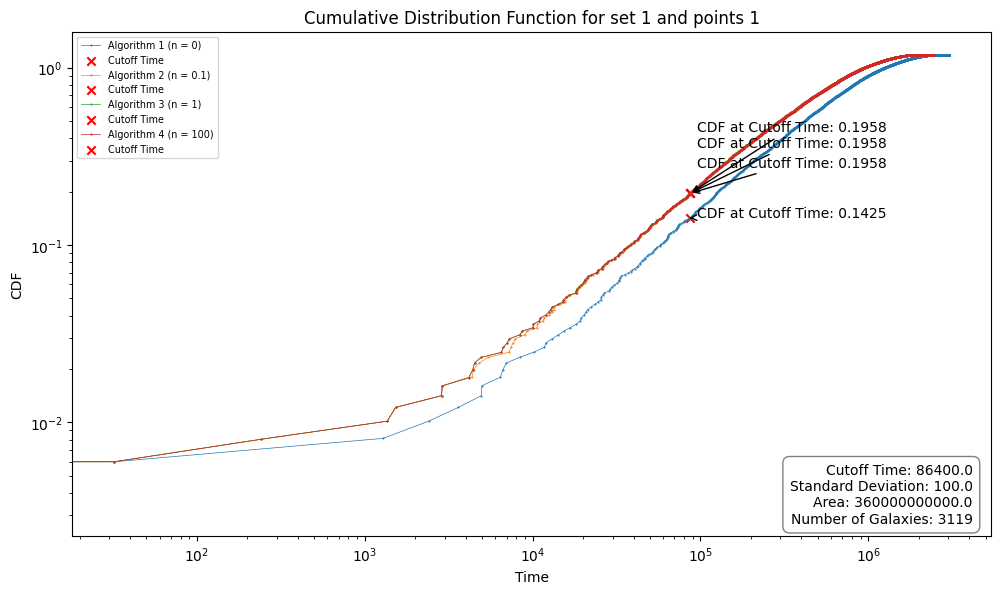

For rate =  0.01  degress/sec and cutoff_time =  21600  seconds


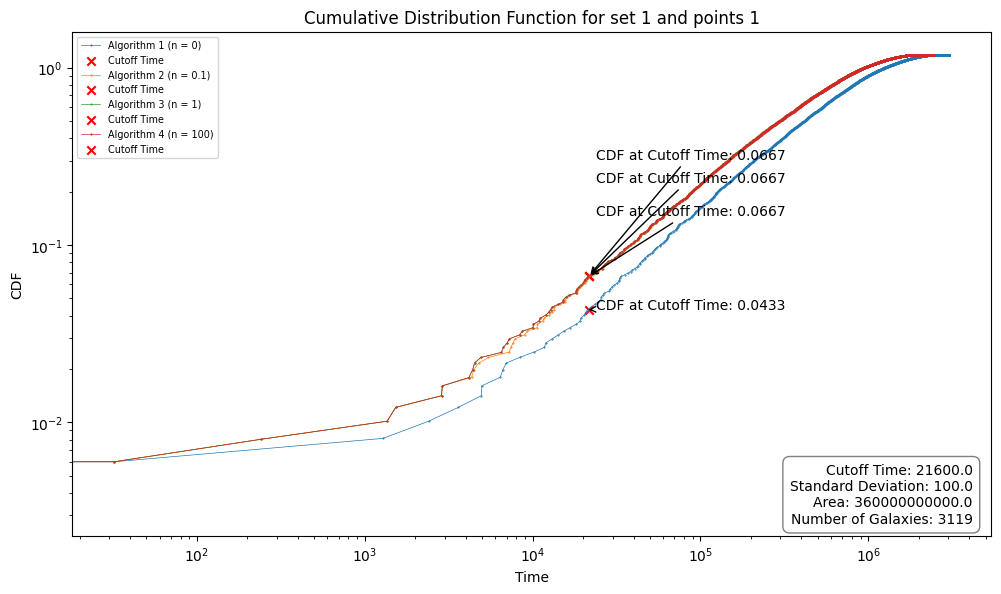

For rate =  0.01  degress/sec and cutoff_time =  3600  seconds


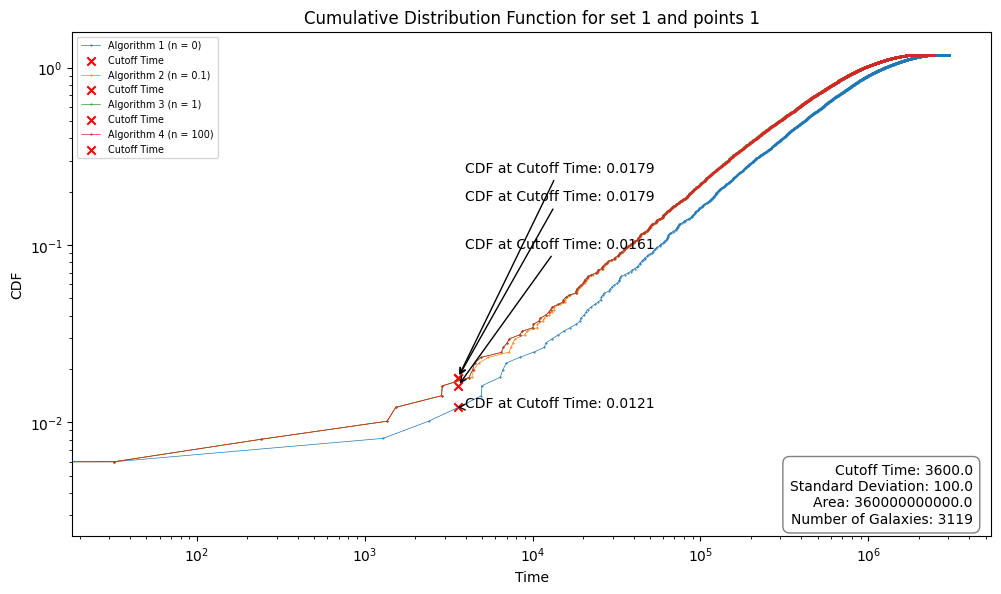

For rate =  0.01  degress/sec and cutoff_time =  60  seconds


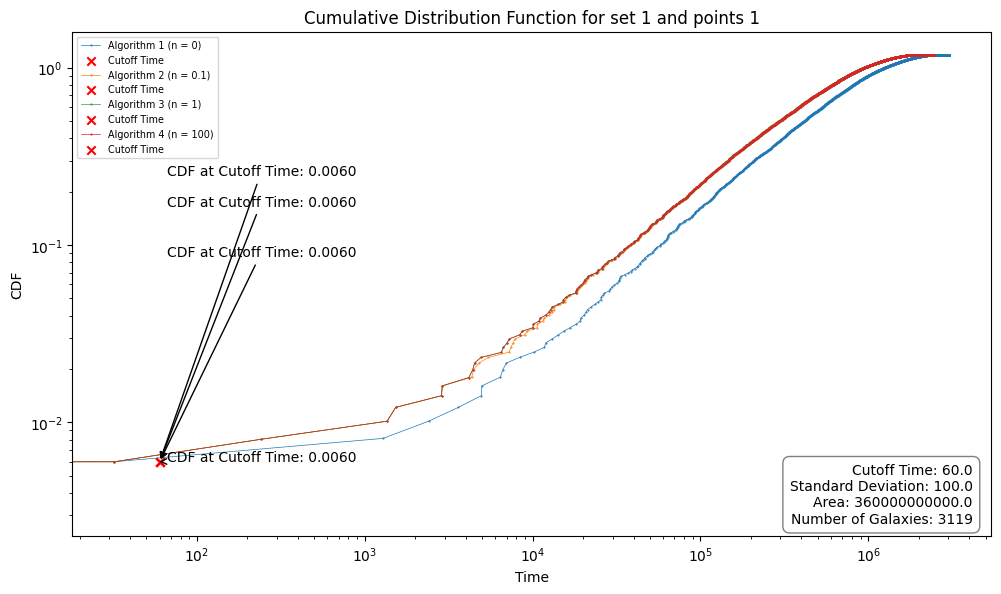

For rate =  0.1  degress/sec and cutoff_time =  86400  seconds


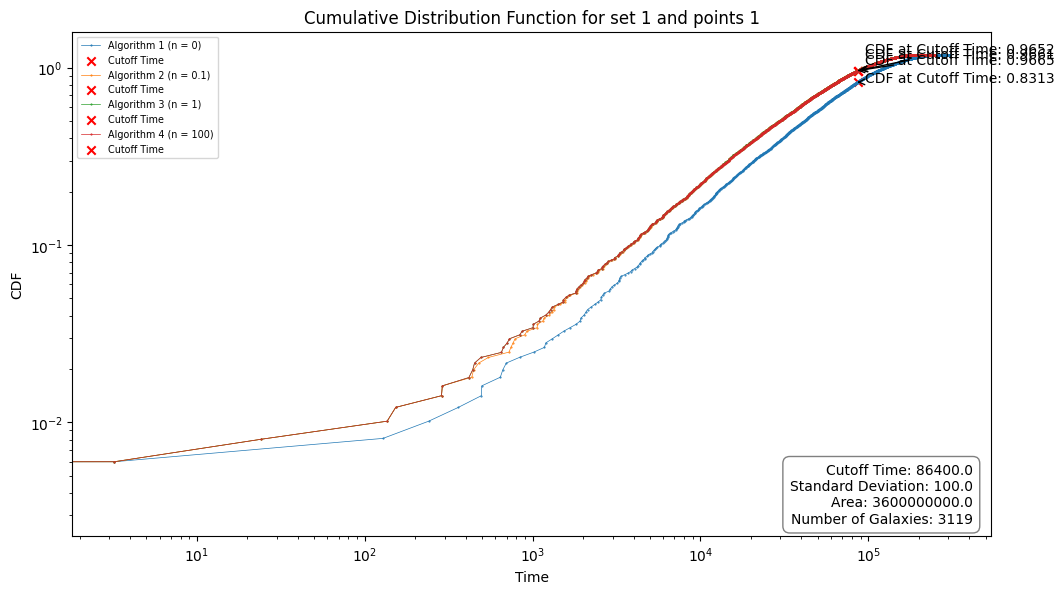

For rate =  0.1  degress/sec and cutoff_time =  21600  seconds


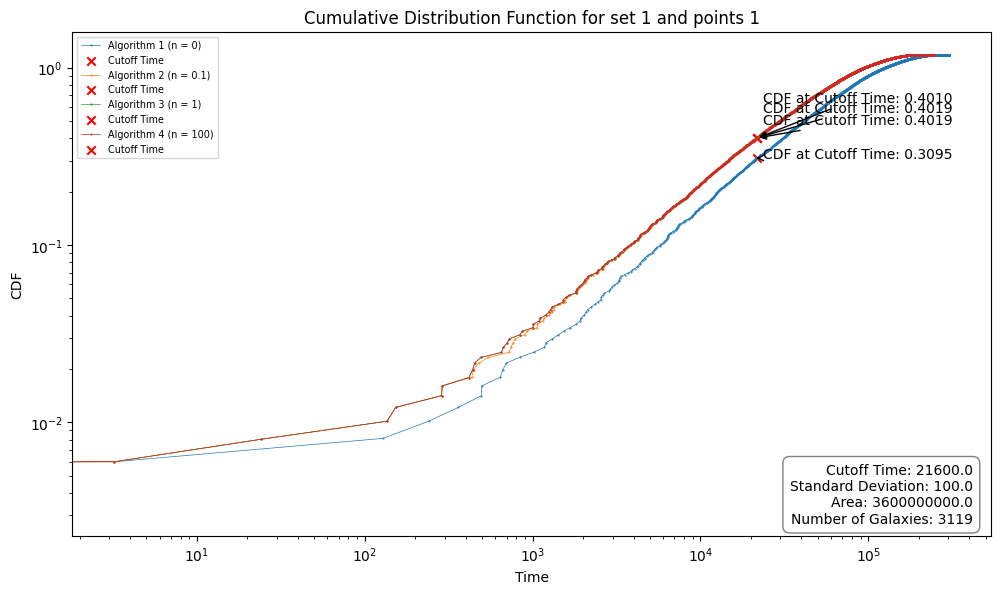

For rate =  0.1  degress/sec and cutoff_time =  3600  seconds


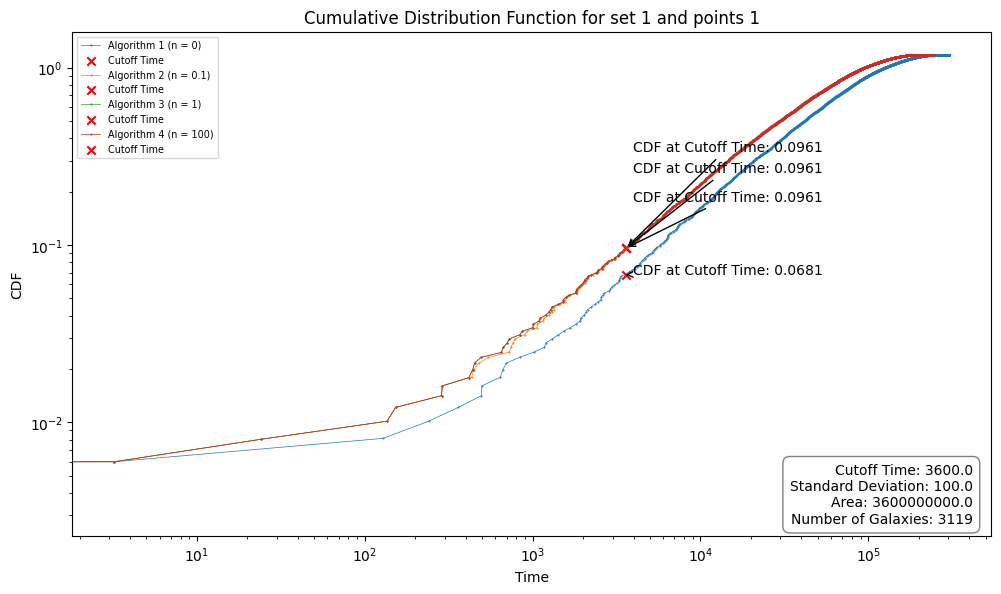

For rate =  0.1  degress/sec and cutoff_time =  60  seconds


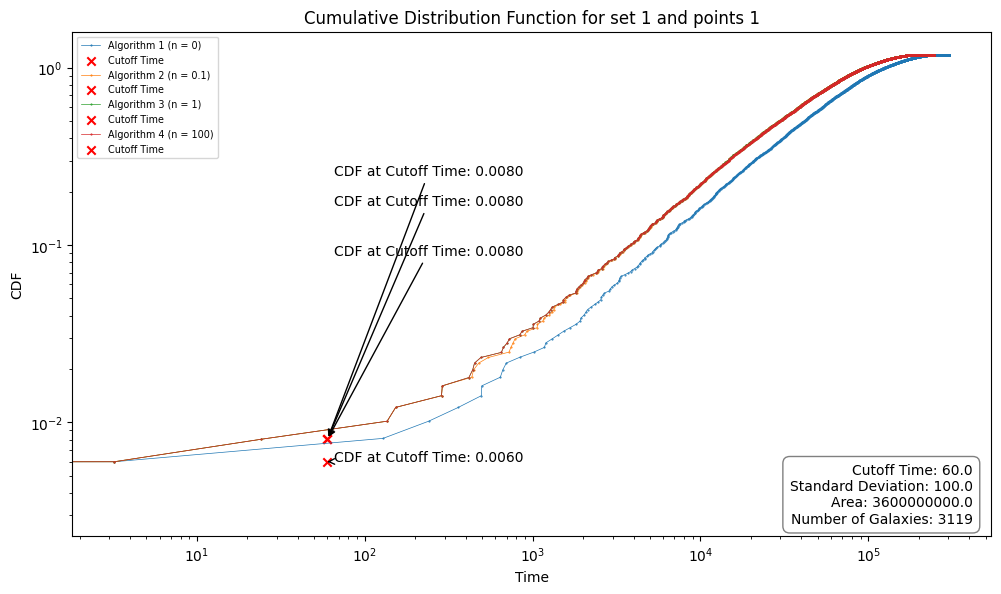

For rate =  1  degress/sec and cutoff_time =  86400  seconds


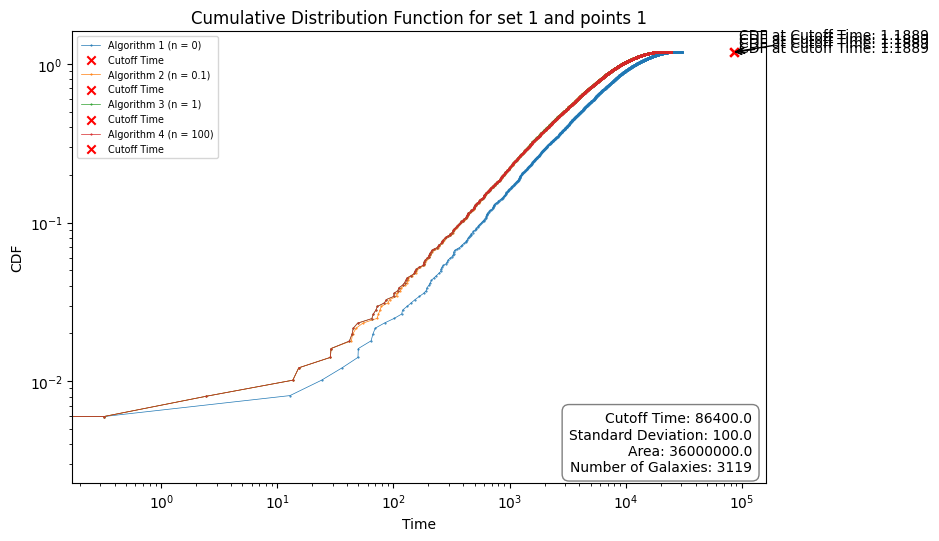

For rate =  1  degress/sec and cutoff_time =  21600  seconds


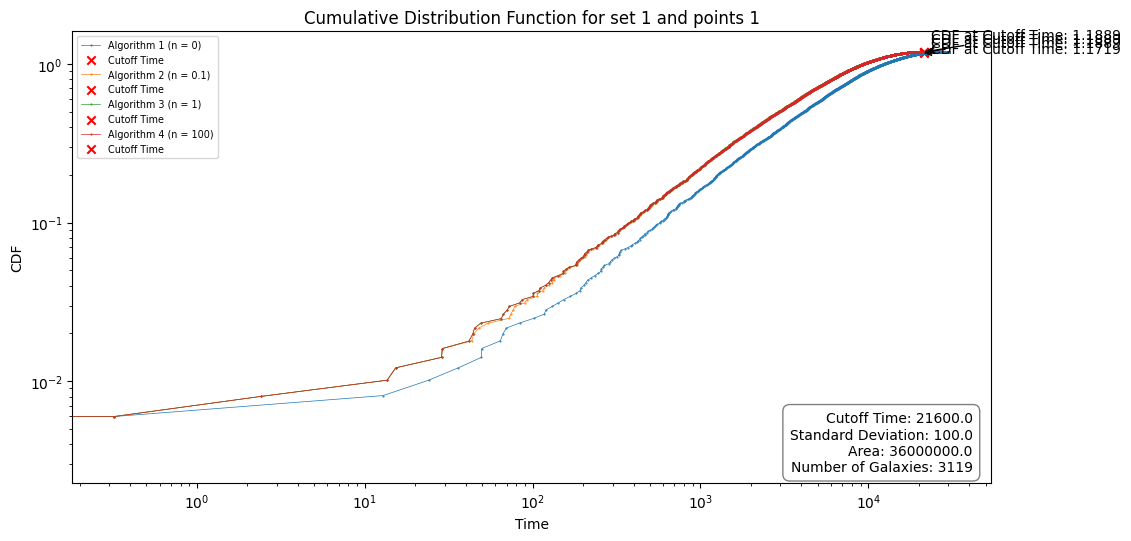

For rate =  1  degress/sec and cutoff_time =  3600  seconds


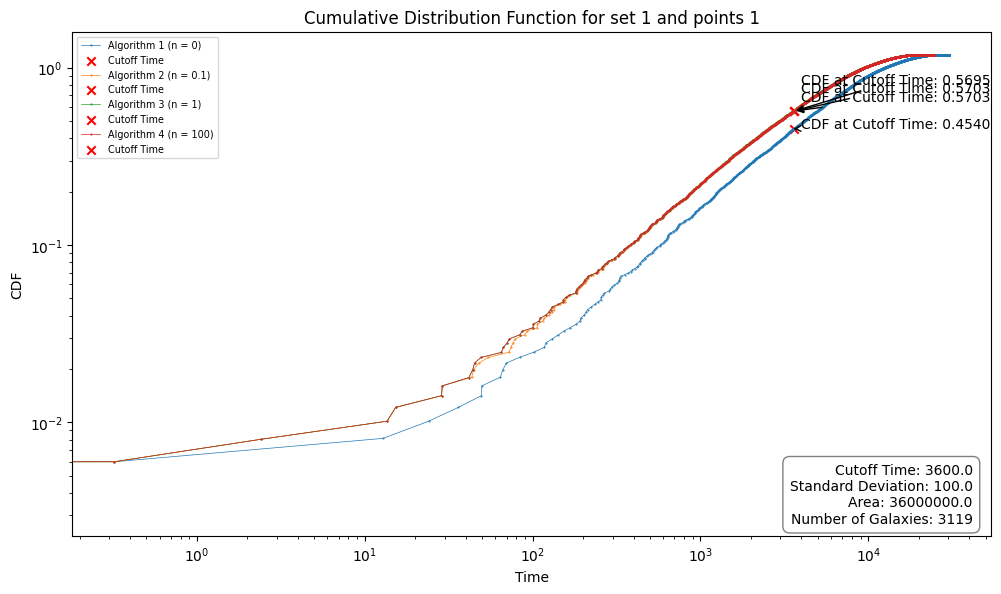

For rate =  1  degress/sec and cutoff_time =  60  seconds


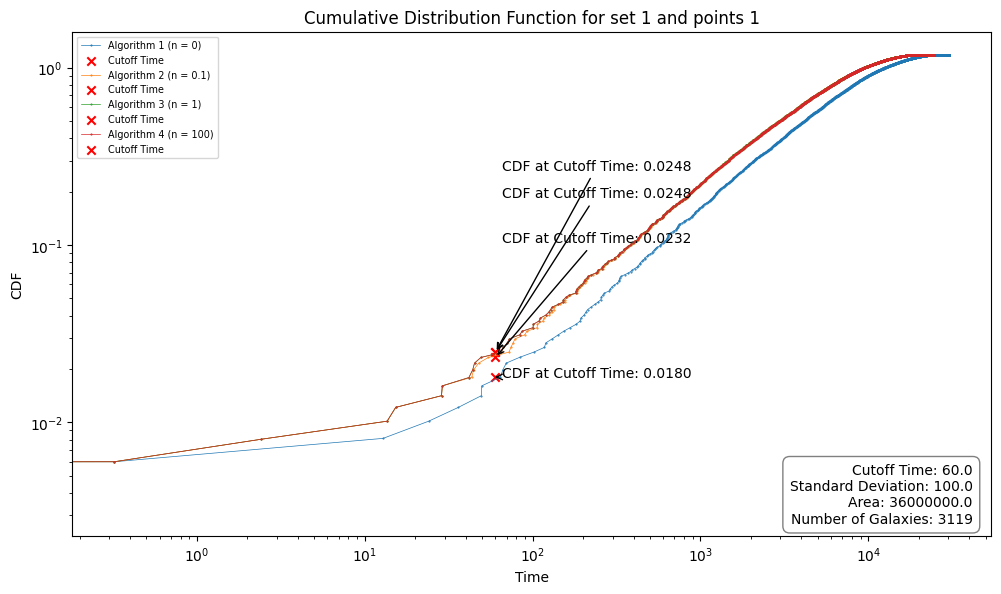

In [25]:
for i,rate_of_movement in enumerate(rate_of_movements):
    for cutoff_time in cutoff_times:
        print("For rate = ",rate_of_movement," degress/sec and cutoff_time = ",cutoff_time," seconds")
        plot_cdf_of_time([[np.array(galaxy_coordinates)]],[np.array([new_df['Probability']])],paths_compounded_twice,n_s,cutoff_time,rate_of_movement,std_dev)

In [26]:
print(cutoff_distance)

60


In [27]:
print(np.array([[maskmap['RA'],maskmap['Dec']]]))
print(np.array([maskmap['Probability']]))

[[[58.382992 46.430611 63.411591 ... 46.4979   48.6396   50.184   ]
  [32.492867 36.786152 25.482941 ... 31.00667  39.7691   40.15106 ]]]
[[3.90553621e-05 4.08015620e-05 4.46329257e-05 ... 5.72285814e-05
  5.08535881e-05 5.30123052e-05]]
